In [ ]:
!pip install matplotlib
!pip install -r analyser/requirements.txt

In [1]:
import pandas
import time
import matplotlib.pyplot as plt
from skmultiflow.drift_detection import ADWIN

In [2]:
df_no_train = pandas.read_csv("result/analyser_1_results.csv", header=0, names=["time"])
df_with_train = pandas.read_csv("result/analyser_0_results.csv", header=0, names=["time"])

In [3]:
df_no_train.head()

,time
0,0.000070
1,0.000061
2,0.000115
3,0.000062
4,0.000109


In [4]:
df_with_train.head()

,time
0,0.000061
1,0.000060
2,0.000052
3,0.000057
4,0.000116


In [5]:
df_data = pandas.read_csv("monitor/data/punching.tsv", header=0, names=["punching"], sep="\t")

In [6]:
delta = 1.0
detector = ADWIN(delta)
last_rate = 0
drift_rate_up = 0.1
drift_rate_down = 0.0001
time_data = []
for potential in df_data["punching"].values:
    start = time.time()
    time.sleep(0.01)
    detector.add_element(potential)
    detector.detected_change()
    if ((drift_rate_up * detector.width) > 0):
        drift_rate = detector.n_detections / detector.width
        if (last_rate <= drift_rate) and (drift_rate >= drift_rate_up):
            delta = detector.delta / 10
            if delta >= drift_rate_down:
                detector.delta = delta
                last_rate = drift_rate
        elif (last_rate >= drift_rate) and (drift_rate <= drift_rate_down):
            delta = detector.delta * 10
            if delta <= drift_rate_up:
                detector.delta = delta
                last_rate = drift_rate
    time_data.append(time.time()-start)
print(f"delta: {detector.delta}, drift rate: {drift_rate}")
detector.reset()

delta: 0.001, drift rate: 0.001834862385321101


Text(0, 0.5, 'Time (seconds)')

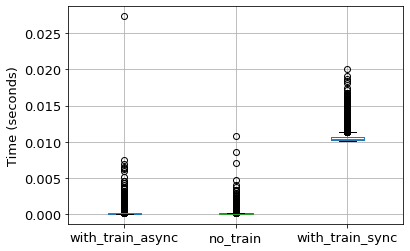

In [7]:
%matplotlib inline
plt.rcParams.update({'font.size': 13})
df = pandas.DataFrame()
df["with_train_async"] = df_with_train.time
df["no_train"] = df_no_train.time
df["with_train_sync"] = pandas.Series(time_data)
ax = df.boxplot()
ax.set_ylabel("Time (seconds)")

In [8]:
df.describe()

,with_train_async,no_train,with_train_sync
count,8120.000000,8120.000000,8120.000000
mean,0.000186,0.000164,0.010579
std,0.000460,0.000281,0.000586
min,0.000052,0.000057,0.010112
25%,0.000088,0.000090,0.010296
50%,0.000110,0.000109,0.010442
75%,0.000149,0.000147,0.010690
max,0.027309,0.010825,0.020054
